In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6
import numpy as np
from datetime import date
from datetime import datetime, timedelta
import math

import seaborn as sns  #The cool light blue background in plots is due to seaborn
sns.set(style='darkgrid', context='talk', palette = 'Dark2')
import matplotlib.dates as mdates
import time as time

from urllib.request import Request, urlopen
from bs4 import BeautifulSoup as bsoup
import lxml
from urllib.request import Request, urlopen
import mibian as mb

In [2]:
dfc = pd.DataFrame()
dfp = pd.DataFrame()
days = float(input('Enter Days to Expiration'))
interest = 8

Enter Days to Expiration1


In [3]:
def calliv():
    
    global days
    global interest
    
    link = 'https://www.nseindia.com/live_market/dynaContent/live_watch/option_chain/optionKeys.jsp?symbolCode=-9999&symbol=BANKNIFTY&symbol=BANKNIFTY&instrument=OPTIDX&date=-&segmentLink=17&segmentLink=17'
    req = Request(link, headers = {'user-agent' : 'Mozilla/5.0'})
    page = urlopen(req).read()
    dfs = pd.read_html(page, header=0)

    y = datetime.now().time()
    x = '9:00' 
    x = pd.to_datetime(x)
    
    expiry = days - (y.hour + y.minute/60 - x.hour)/6.5
    
    chain = pd.DataFrame()
    chain = dfs[1] 
    
    chain.drop(chain.index[[0,1,2]], inplace = True)
    chain.reset_index(inplace = True)
    
    a = dfs[0].columns
    banknifty = float(a[1][28:36])
    
    upper = banknifty + 800
    lower = banknifty - 800
    
    strike = []
    iv = []

    for i in range(len(chain['Unnamed: 11'])):
        
        if float(chain['Unnamed: 11'][i]) >= lower and float(chain['Unnamed: 11'][i])<= upper:
        
          try:
       
            ltp = float(chain['Unnamed: 5'][i])
            strike.append((chain['Unnamed: 11'][i])[:5])
            c = mb.BS([banknifty, float(chain['Unnamed: 11'][i]), interest, expiry], callPrice = ltp)
            iv.append(c.impliedVolatility)           
        
          except Exception:
                       
            pass
        
        
    d = dict(zip(strike, iv)) 
    df = pd.DataFrame([d.values()], columns = d.keys())
    df['Time'] = ""
    df['Time'][0] = datetime.now().strftime('%I:%M %p')

    global dfc
    dfc = pd.concat([dfc,df], ignore_index = True)
    
    

    
def putiv():
    
    global days
    global interest
    
    link = 'https://www.nseindia.com/live_market/dynaContent/live_watch/option_chain/optionKeys.jsp?symbolCode=-9999&symbol=BANKNIFTY&symbol=BANKNIFTY&instrument=OPTIDX&date=-&segmentLink=17&segmentLink=17'
    req = Request(link, headers = {'user-agent' : 'Mozilla/5.0'})
    page = urlopen(req).read()
    dfs = pd.read_html(page, header=0)
    
    y = datetime.now().time()
    x = '9:00' 
    x = pd.to_datetime(x)
    
    expiry = days - (y.hour + y.minute/60 - x.hour - x.minute/60)/6.5

    chain = pd.DataFrame()
    chain = dfs[1] 
    
    chain.drop(chain.index[[0,1,2]], inplace = True)
    chain.reset_index(inplace = True)
    
    a = dfs[0].columns
    banknifty = float(a[1][28:36])
    
    upper = banknifty + 800
    lower = banknifty - 800
    
    strike = []
    iv = []

    for i in range(len(chain['Unnamed: 11'])):
        
        if float(chain['Unnamed: 11'][i]) >= lower and float(chain['Unnamed: 11'][i])<= upper:
        
          try:
       
            ltp = float(chain['Unnamed: 17'][i])
            strike.append((chain['Unnamed: 11'][i])[:5])
            c = mb.BS([banknifty, float(chain['Unnamed: 11'][i]), interest, expiry], putPrice = ltp)
            iv.append(c.impliedVolatility)           
        
          except Exception:
                       
            pass
        
        
    d = dict(zip(strike, iv)) 
    df = pd.DataFrame([d.values()], columns = d.keys())
    df['Time'] = ""
    df['Time'][0] = datetime.now().strftime('%I:%M %p')

    global dfp
    dfp = pd.concat([dfp,df], ignore_index = True)
    

In [4]:
def iv_update(interval):
    
    while True:
        
        calliv()
        putiv()
        
        time.sleep(interval)
        #print(df.tail(1))

In [5]:
def plotiv(type_,strike):
    
    if type_ == 'call':
        
       # plt.axes()
       # plt.ylim([5,50])
        plt.scatter(dfc['Time'],dfc[strike], color = 'tab:red')
        plt.plot(dfc[strike], label = 'IV Curve')
        plt.title('{}_Call Today IV History'.format(strike))
        plt.xlabel('Time')
        plt.ylabel('Implied Volatility')
        plt.xticks(rotation = 60)
        plt.legend()
        
    else:
        
       # plt.axes()
       # plt.ylim([5,50])
        plt.scatter(dfp['Time'],dfp[strike], color = 'tab:red')
        plt.plot(dfp[strike], label = 'IV Curve')
        plt.title('{}_Put Today IV History'.format(strike))
        plt.xlabel('Time')
        plt.ylabel('Implied Volatility')
        plt.xticks(rotation = 60)
        plt.legend()

In [105]:
iv_update(100)

/home/ayush/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ayush/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:54: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

/home/ayush/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ayush/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:112: FutureWar

KeyboardInterrupt: 

In [15]:
dfc

,24000,24100,24200,24300,24400,24500,24600,24700,24800,24900,25000,25100,25200,25300,25400,25500,25600,25700,Time
0,NaN,0.000010,0.00001,0.00001,0.00001,0.00001,0.000010,18.783569,20.996094,21.690369,22.644043,23.223877,24.780273,26.321411,28.167725,30.487061,33.203125,NaN,12:22 PM
1,NaN,0.000010,0.00001,0.00001,0.00001,0.00001,0.000010,21.179199,21.377563,22.033691,22.434235,22.888184,24.520874,26.412964,28.320312,30.639648,33.142090,NaN,12:25 PM
2,NaN,0.000010,0.00001,0.00001,0.00001,0.00001,0.000010,16.819000,19.653320,21.209717,22.071838,22.682190,24.353027,26.123047,28.076172,30.639648,33.142090,NaN,12:27 PM
3,NaN,0.000010,0.00001,0.00001,0.00001,0.00001,0.000010,18.894196,21.331787,22.338867,23.216248,23.437500,25.009155,26.794434,28.717041,30.944824,34.179688,NaN,12:31 PM
4,0.00001,0.000010,0.00001,0.00001,0.00001,0.00001,12.451172,20.835876,22.293091,23.124695,23.494720,23.925781,25.688171,27.343750,29.418945,32.226562,NaN,NaN,12:34 PM
5,0.00001,43.945312,0.00001,0.00001,0.00001,0.00001,17.341614,22.705078,23.820877,24.108887,24.505615,24.780273,26.245117,27.832031,29.785156,32.287598,NaN,NaN,12:36 PM
6,NaN,0.000010,0.00001,0.00001,0.00001,0.00001,0.000010,19.622803,21.667480,22.924423,23.674011,24.108887,25.756836,27.099609,29.052734,31.738281,34.545898,NaN,12:39 PM
7,NaN,0.000010,0.00001,0.00001,0.00001,0.00001,0.000010,20.446777,22.415161,23.426056,24.242401,24.826050,26.489258,27.709961,29.296875,32.226562,35.034180,NaN,12:41 PM
8,0.00001,15.625000,0.00001,0.00001,0.00001,0.00001,16.296387,22.033691,23.315430,24.024963,24.719238,25.146484,26.855469,28.381348,30.212402,32.714844,NaN,NaN,12:44 PM
9,NaN,0.000010,0.00001,0.00001,0.00001,0.00001,0.000010,18.737793,21.572113,22.928238,23.864746,24.269104,26.000977,27.587891,29.296875,32.226562,34.179688,NaN,12:46 PM


In [25]:
dfp

,24000,24100,24200,24300,24400,24500,24600,24700,24800,24900,25000,25100,25200,25300,25400,25500,25600,25700,Time
0,NaN,37.353516,35.400391,33.721924,32.470703,31.097412,29.865265,28.106689,26.031494,24.017334,24.566650,23.567200,0.000010,0.000010,0.000010,0.000010,72.628021,NaN,12:22 PM
1,NaN,38.665771,36.193848,34.057617,32.791138,31.494141,29.785156,27.679443,25.512695,24.227142,23.376465,22.613525,28.900146,17.578125,0.000010,0.000010,86.448669,NaN,12:25 PM
2,NaN,36.621094,35.644531,34.545898,33.599854,32.531738,31.433105,29.937744,28.961182,28.718948,28.976440,29.781342,39.222717,40.763855,41.297913,42.282104,80.112457,NaN,12:32 PM
3,NaN,36.865234,35.888672,34.790039,33.554077,32.592773,30.853271,29.544830,28.350830,27.832031,28.427124,27.404785,34.790039,39.100647,47.111511,50.445557,73.516846,NaN,12:34 PM
4,37.109375,35.980225,35.156250,34.057617,33.081055,31.951904,30.212402,28.350830,27.145386,25.943756,24.475098,24.169922,29.861450,22.460938,35.278320,0.000010,NaN,NaN,12:36 PM
5,NaN,38.574219,36.911011,35.125732,34.172058,33.237457,31.860352,30.311584,29.571533,29.663086,30.700684,33.920288,41.839600,45.898438,65.307617,73.852539,63.476562,NaN,12:39 PM
6,NaN,37.109375,35.858154,34.683228,33.508301,32.104492,30.792236,28.924942,27.660370,27.130127,27.587891,28.648376,38.520813,38.940430,40.649414,41.748047,0.000010,NaN,12:41 PM
7,38.818359,37.109375,36.148071,34.896851,33.691406,32.226562,30.609131,29.058456,27.425766,26.733398,25.878906,26.794434,34.294128,32.226562,0.000010,0.000010,NaN,NaN,12:44 PM
8,NaN,38.391113,36.819458,35.446167,34.545898,33.592224,32.348633,30.696869,29.077530,29.136658,28.942108,30.025482,37.658691,42.175293,49.316406,51.216125,57.189941,NaN,12:47 PM
9,NaN,39.062500,38.085938,36.865234,35.339355,33.767700,32.104492,30.090332,28.411865,27.618408,28.289795,29.891968,35.888672,41.194916,39.672852,40.878296,81.970215,NaN,12:49 PM


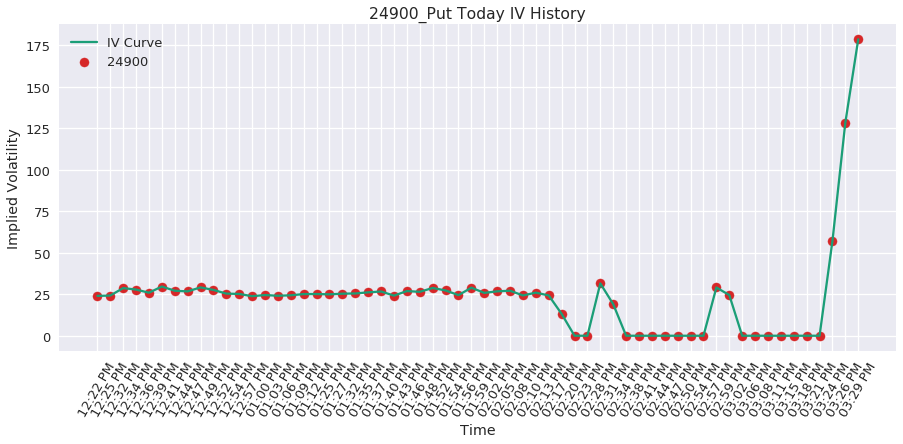

In [106]:
plotiv('put','24900')

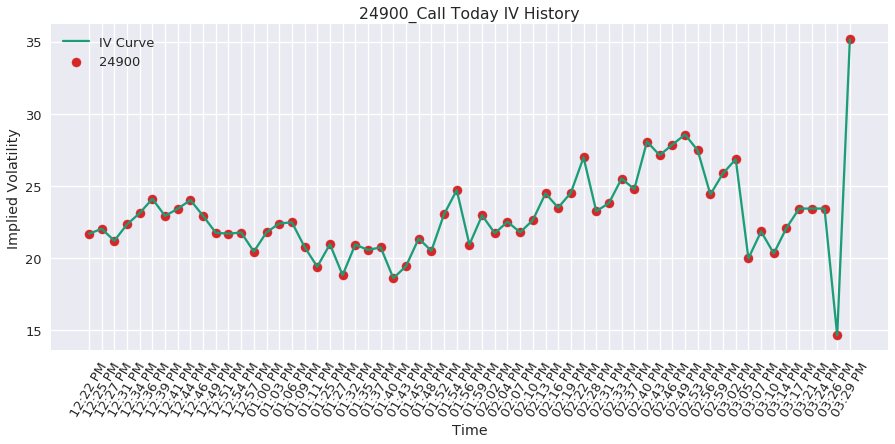

In [107]:
plotiv('call','24900')

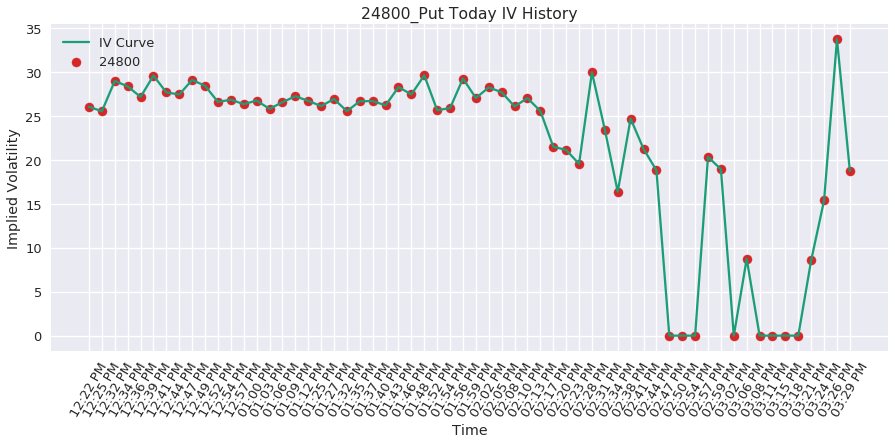

In [108]:
plotiv('put','24800')

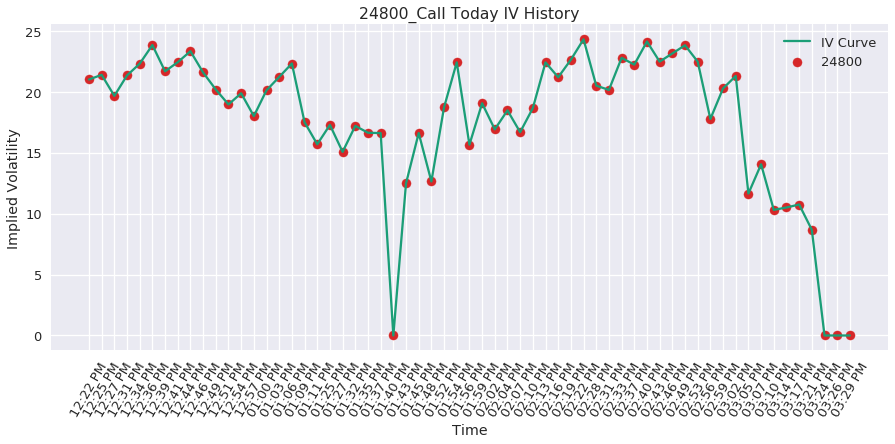

In [109]:
plotiv('call','24800')

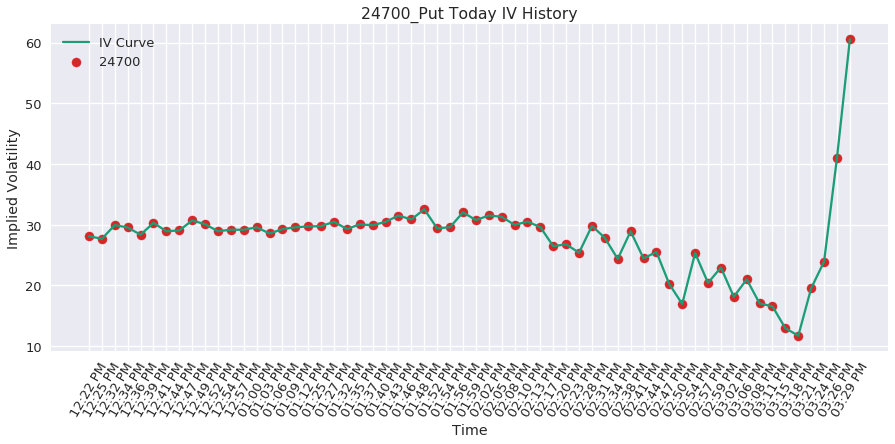

In [110]:
plotiv('put', '24700')

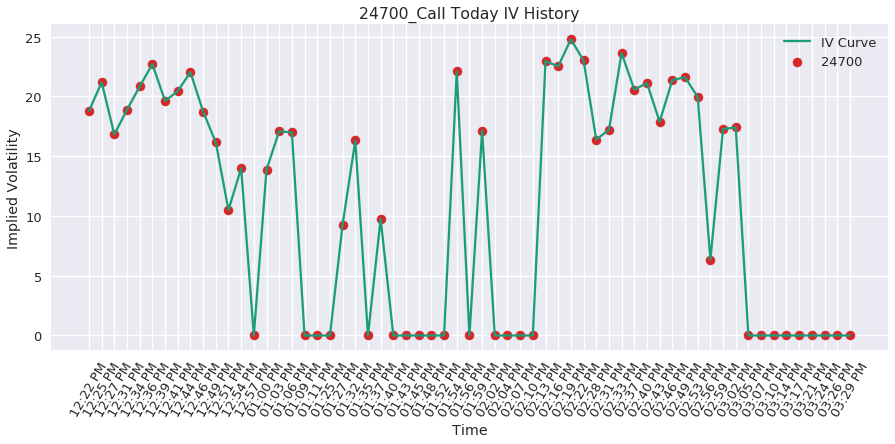

In [111]:
plotiv('call','24700')

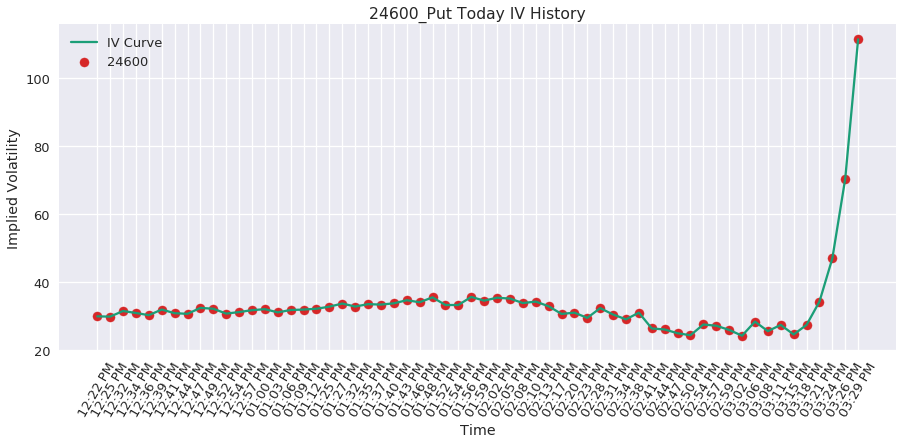

In [112]:
plotiv('put', '24600')

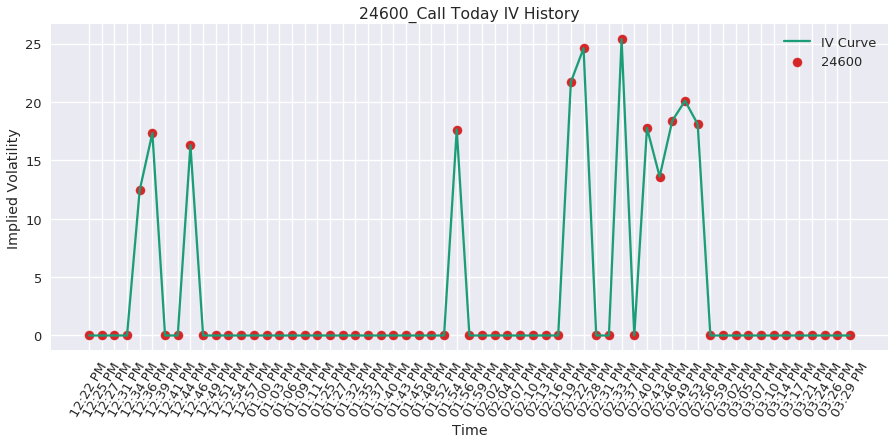

In [113]:
plotiv('call','24600')

In [101]:
link = 'https://www.nseindia.com/live_market/dynaContent/live_watch/option_chain/optionKeys.jsp?symbolCode=-9999&symbol=BANKNIFTY&symbol=BANKNIFTY&instrument=OPTIDX&date=-&segmentLink=17&segmentLink=17'
req = Request(link, headers = {'user-agent' : 'Mozilla/5.0'})
page = urlopen(req).read()
dfs = pd.read_html(page, header=0)

chain = pd.DataFrame()
chain = dfs[1] 
    
chain.drop(chain.index[[0,1,2]], inplace = True)
chain.reset_index(inplace = True)
    
a = dfs[0].columns

In [126]:
d = a[1][56:61]

In [127]:
d

'15:30'

In [128]:
d = pd.to_datetime(d)

In [120]:
d

Timestamp('2018-10-10 15:30:00')

In [121]:
d = d.strftime('%I:%M %p')

In [122]:
d

'03:30 PM'

In [124]:
s = '9:00'

In [125]:
s = pd.to_datetime(s)

In [129]:
d-s

Timedelta('0 days 06:30:00')

In [132]:
m = '1:00'
m = pd.to_datetime(m)

In [133]:
d-m

Timedelta('0 days 14:30:00')

In [134]:
datetime.now()

datetime.datetime(2018, 10, 10, 6, 37, 25, 997630)

In [137]:
timestamp.now()

NameError: name 'timestamp' is not defined

In [138]:
float(d-s)

TypeError: float() argument must be a string or a number, not 'Timedelta'

In [139]:
datetime.now() - s

Timedelta('-1 days +21:40:04.623576')

In [143]:
n = datetime.now().time()

In [141]:
s

Timestamp('2018-10-10 09:00:00')

In [145]:
f = (s.hour + s.minute/60)

In [146]:
k = (n.hour + n.minute/60)

In [149]:
d = (f-k)/6.5

In [150]:
d

0.35128205128205126

In [151]:
f-k

2.283333333333333

In [165]:
time.time()

1539136473.6070967

In [168]:
y = datetime.now().time()
x = '9:00' 
x = pd.to_datetime(x)
    
expiry = days - (y.hour + y.minute/60 - x.hour - x.minute/60)/6.5


In [169]:
expiry

2.2

In [217]:
dfc.to_csv('/home/ayush/Desktop/iv/c.csv')
dfp.to_csv('/home/ayush/Desktop/iv/p.csv')